In [79]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [80]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines, numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util#correlation_plots

import R2h_module
import imp
imp.reload(R2h_module)

import mplhep as hep
hep.style.use("CMS")

In [81]:
def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

In [82]:
%%time
dfs_pair = {}
dfs_trigger = {}
#path_data="/home/sebouh/di-hadron"
path_data="/home/seba/di-hadron/P27"
for target in ['C','Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    dfs_pair[target]=getdatainChunks('%s/Pairs_%s.root'%(path_data,target), target)
    dfs_pair['D_%s'%target]= getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 'D_%s'%target)  
    print ('Get trigger dataframes from deuterium target %s'%target)
    dfs_trigger['%s'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                      '%s_trigger'%target)
    dfs_trigger['D_%s'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                        'D_%s_trigger'%target)

Getting dataframes from target C


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Get trigger dataframes from deuterium target C


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Getting dataframes from target Fe


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Get trigger dataframes from deuterium target Fe


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Getting dataframes from target Pb


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Get trigger dataframes from deuterium target Pb


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


CPU times: user 5.68 s, sys: 1.55 s, total: 7.24 s
Wall time: 7.24 s


In [83]:
#get GiBUU
import uproot

def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df
import glob
tweaks=[a[-34:-5] for a in glob.glob("GiBUU_Pairs_tweak_2023*.root")]
#tweaks="_tweak_2023_02_09_16h_49m_08s",\
#            "_tweak_2023_02_09_16h_50m_42s", "_tweak_2023_02_09_16h_52m_03s"
pathGIBUU="./"
for target in ['D']:
    for suffix in tweaks:
        print (target+suffix)
        print (' trigger')
        dfs_trigger['GiBUU_%s'%target+suffix]= getdatainChunks('%sGiBUU_Pairs%s.root'%(pathGIBUU,suffix), 
                                                               '%s_trigger'%target)
        print (' pairs')
        dfs_pair['GiBUU_%s'%target+suffix]= getdatainChunks('%sGiBUU_Pairs%s.root'%(pathGIBUU,suffix),target)
print (dfs_trigger.keys())

D_tweak_2023_02_10_18h_16m_59s
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_2023_02_10_18h_19m_22s
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_2023_02_09_16h_53m_27s
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_2023_02_09_16h_58m_52s
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_2023_02_09_16h_57m_49s
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_2023_02_09_16h_55m_45s
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_2023_02_09_16h_49m_08s
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_2023_02_10_18h_18m_09s
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_2023_02_09_16h_56m_47s
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_2023_02_10_18h_13m_28s
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_2023_02_09_16h_50m_42s
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_2023_02_10_18h_20m_29s
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_2023_02_10_18h_15m_48s
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_2023_02_10_18h_14m_45s
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_2023_02_09_16h_52m_03s
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D_tweak_2023_02_10_18h_16m_59s', 'GiBUU_D_tweak_2023_02_10_18h_19m_22s', 'GiBUU_D_tweak_2023_02_09_16h_53m_27s', 'GiBUU_D_tweak_2023_02_09_16h_58m_52s', 'GiBUU_D_tweak_2023_02_09_16h_57m_49s', 'GiBUU_D_tweak_2023_02_09_16h_55m_45s', 'GiBUU_D_tweak_2023_02_09_16h_49m_08s', 'GiBUU_D_tweak_2023_02_10_18h_18m_09s', 'GiBUU_D_tweak_2023_02_09_16h_56m_47s', 'GiBUU_D_tweak_2023_02_10_18h_13m_28s', 'GiBUU_D_tweak_2023_02_09_16h_50m_42s', 'GiBUU_D_tweak_2023_02_10_18h_20m_29s', 'GiBUU_D_tweak_2023_02_10_18h_15m_48s', 'GiBUU_D_tweak_2023_02_10_18h_14m_45s', 'GiBUU_D_tweak_2023_02_09_16h_52m_03s'])


In [84]:
for dct in dfs_pair, dfs_trigger:
    print(dct.keys())
    dct['D'] = pd.concat([dct['D_'+a] for a in 'C Fe Pb'.split()])

dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D_tweak_2023_02_10_18h_16m_59s', 'GiBUU_D_tweak_2023_02_10_18h_19m_22s', 'GiBUU_D_tweak_2023_02_09_16h_53m_27s', 'GiBUU_D_tweak_2023_02_09_16h_58m_52s', 'GiBUU_D_tweak_2023_02_09_16h_57m_49s', 'GiBUU_D_tweak_2023_02_09_16h_55m_45s', 'GiBUU_D_tweak_2023_02_09_16h_49m_08s', 'GiBUU_D_tweak_2023_02_10_18h_18m_09s', 'GiBUU_D_tweak_2023_02_09_16h_56m_47s', 'GiBUU_D_tweak_2023_02_10_18h_13m_28s', 'GiBUU_D_tweak_2023_02_09_16h_50m_42s', 'GiBUU_D_tweak_2023_02_10_18h_20m_29s', 'GiBUU_D_tweak_2023_02_10_18h_15m_48s', 'GiBUU_D_tweak_2023_02_10_18h_14m_45s', 'GiBUU_D_tweak_2023_02_09_16h_52m_03s'])
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D_tweak_2023_02_10_18h_16m_59s', 'GiBUU_D_tweak_2023_02_10_18h_19m_22s', 'GiBUU_D_tweak_2023_02_09_16h_53m_27s', 'GiBUU_D_tweak_2023_02_09_16h_58m_52s', 'GiBUU_D_tweak_2023_02_09_16h_57m_49s', 'GiBUU_D_tweak_2023_02_09_16h_55m_45s', 'GiBUU_D_tweak_2023_02_09_16h_49m_08s', 'GiBUU_D_tweak_20

In [85]:
%%time
import R2h_module as r2h

for key in dfs_pair.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print ('\nkey: ',key)
    dfs_pair[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_pair[key].rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)
    dfs_pair[key] = r2h.applyCuts(dfs_pair[key],isMC=isMC, nomCuts=True)
    dfs_pair[key] = r2h.applyCutsPair(dfs_pair[key],isMC=isMC, nomCuts=True)


key:  C
Entries before cut  131591
Q2>1.0 and Q2<4.0 131591  (100.00  %)
0.2<h1_p<5.0  131585  (100.00  %)
inelasticity < 0.85 131585  (100.00  %)
h1_pid = pions (trigger) 131585  (100.00  %)
2.2 < nu <4.2 129258  (98.23  %)
10< h1_th 129258  (100.00  %)
Theta/P fiducial region selected for trigger hadron 129258  (100.00  %)
Nom cuts for the trigger applied 44785  (34.65  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 44785  (100.00  %)
2.2 < nu < 4.2 44785  (100.00  %)
secondary hadrons are pions 44785  (100.00  %)
(h1_pid*h2_pid)<0, opposite charge pions 35717  (79.75  %)
kinematic limits for h2_z 35636  (99.77  %)
kinematic limits for dphi 35596  (99.89  %)
kinematic limits for pair_mass 35415  (99.49  %)
leading hadrons are pions 35415  (100.00  %)
0.2<h2_p<5.0 35415  (100.00  %)
0.2<h1_p<5.0 35415  (100.00  %)
10<h2_th 35415  (100.00  %)
Theta/P fiducial region selected for secondary hadron 32420  (91.54  %)
10< h1_th 32420  (100.00  %)
Theta/P fiducial region

inelasticity < 0.85 474107  (100.00  %)
h1_pid = pions (trigger) 474107  (100.00  %)
2.2 < nu <4.2 455225  (96.02  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 455225  (100.00  %)
2.2 < nu < 4.2 455225  (100.00  %)
secondary hadrons are pions 269759  (59.26  %)
(h1_pid*h2_pid)<0, opposite charge pions 260370  (96.52  %)
kinematic limits for h2_z 250400  (96.17  %)
kinematic limits for dphi 250122  (99.89  %)
kinematic limits for pair_mass 249485  (99.75  %)
leading hadrons are pions 249485  (100.00  %)
0.2<h2_p<5.0 228126  (91.44  %)
0.2<h1_p<5.0 228126  (100.00  %)

key:  GiBUU_D_tweak_2023_02_09_16h_58m_52s
Entries before cut  472940
Q2>1.0 and Q2<4.0 472760  (99.96  %)
0.2<h1_p<5.0  472760  (100.00  %)
inelasticity < 0.85 472760  (100.00  %)
h1_pid = pions (trigger) 472760  (100.00  %)
2.2 < nu <4.2 453630  (95.95  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 453630  (100.00  %)
2.2 < nu < 4.2 453630  (100.00  %)
secondary hadrons are pions 26

1.0< Q2 <4.0 461102  (100.00  %)
2.2 < nu < 4.2 461102  (100.00  %)
secondary hadrons are pions 278137  (60.32  %)
(h1_pid*h2_pid)<0, opposite charge pions 266053  (95.66  %)
kinematic limits for h2_z 255781  (96.14  %)
kinematic limits for dphi 255539  (99.91  %)
kinematic limits for pair_mass 254894  (99.75  %)
leading hadrons are pions 254894  (100.00  %)
0.2<h2_p<5.0 232651  (91.27  %)
0.2<h1_p<5.0 232651  (100.00  %)

key:  GiBUU_D_tweak_2023_02_09_16h_52m_03s
Entries before cut  468618
Q2>1.0 and Q2<4.0 468416  (99.96  %)
0.2<h1_p<5.0  468416  (100.00  %)
inelasticity < 0.85 468416  (100.00  %)
h1_pid = pions (trigger) 468416  (100.00  %)
2.2 < nu <4.2 449483  (95.96  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 449483  (100.00  %)
2.2 < nu < 4.2 449483  (100.00  %)
secondary hadrons are pions 263970  (58.73  %)
(h1_pid*h2_pid)<0, opposite charge pions 255132  (96.65  %)
kinematic limits for h2_z 245275  (96.14  %)
kinematic limits for dphi 245018  (99.90  %)


In [86]:
for key in dfs_trigger.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True    
    print (key, isMC)
    dfs_trigger[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_trigger[key] = r2h.applyCuts(dfs_trigger[key],isTrigger=True, isMC=isMC, nomCuts=True)
    print (' ')
    

C False
Entries before cut  652690
Q2>1.0 and Q2<4.0 652690  (100.00  %)
0.2<h1_p<5.0  652674  (100.00  %)
inelasticity < 0.85 652674  (100.00  %)
h1_pid = pions (trigger) 652674  (100.00  %)
2.2 < nu <4.2 642836  (98.49  %)
10< h1_th 642836  (100.00  %)
Theta/P fiducial region selected for trigger hadron 642836  (100.00  %)
Nom cuts for the trigger applied 291788  (45.39  %)
 
D_C False
Entries before cut  875478
Q2>1.0 and Q2<4.0 875478  (100.00  %)
0.2<h1_p<5.0  875467  (100.00  %)
inelasticity < 0.85 875467  (100.00  %)
h1_pid = pions (trigger) 875467  (100.00  %)
2.2 < nu <4.2 863117  (98.59  %)
10< h1_th 863117  (100.00  %)
Theta/P fiducial region selected for trigger hadron 863117  (100.00  %)
Nom cuts for the trigger applied 405810  (47.02  %)
 
Fe False
Entries before cut  370123
Q2>1.0 and Q2<4.0 370122  (100.00  %)
0.2<h1_p<5.0  370122  (100.00  %)
inelasticity < 0.85 370122  (100.00  %)
h1_pid = pions (trigger) 370122  (100.00  %)
2.2 < nu <4.2 370122  (100.00  %)
10< h1_th

In [87]:
#dfs_mc= {f"{a}_2pi":root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_{a}.root",a) for a in "C Fe Pb".split()}
#dfs_mc["D_2pi"] = root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_C.root","D_C")

# Cuts used in PRL

In [88]:
#cuts used in the PRL paper
dpionMassBins=11
maxzmass=1.7
minzmass=0.3

dpiondphiBins=9
maxdphi=3.14
mindphi=0.0

dpionz2Bins=9
maxz2=0.45
minz2=0.05


p_thr=2.7
Nphe_thr=5
Nphe_h1_cut='h1_Nphe> (%d*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Nphe_h2_cut='h2_Nphe> (%d*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Chi2CC_h1_cut='h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
Chi2CC_h2_cut='h2_Chi2CC < (0.08726*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) +10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
StatCC_h1_cut='h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -1 ))'%(p_thr,p_thr)
StatCC_h2_cut='h2_StatCC>((( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -1 ))'%(p_thr,p_thr)

#pair_cut_nom  ='and h1_th<90 and h1_th>10 and h2_th<90 and h2_th>10 and h1_z>0.5 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s and (h1_z+h2_z)<1.0 and (h1_pid*h2_pid)<0.  and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and h2_FidCutPiPlus==1 and %s and %s and %s and %s and %s and %s'%(minz2,maxz2,maxzmass ,minzmass, Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
#trigger_cut_nom   ='h1_z>0.5 and h1_th<90 and h1_th>10 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)

PRL_pair_cut_nom  =' and h1_th>10 and h2_th>10 and h1_z>0.5 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s and (h1_z+h2_z)<1.0 and (h1_pid*h2_pid)<0.  and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and h2_FidCutPiPlus==1 and %s and %s and %s and %s and %s and %s'%(minz2,maxz2,maxzmass ,minzmass, Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
PRL_trigger_cut_nom   ='h1_z>0.5 and h1_th>10 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)

In [89]:
for df in list(dfs_pair.values())+ list(dfs_trigger.values()):
    h1_pz= "sqrt(h1_p**2-h1_cm_pt**2)*(2*(h1_rap>0)-1)"
    theta_e="2*arcsin(sqrt(Q2/(4*5.014*(5.014-nu))))"
    theta_q=f'arctan2((5.014-nu)*sin({theta_e}),(5.014-(5.014-nu)*cos({theta_e})))'
    theta_qe=f"{theta_q}+{theta_e}"
    e_pz = f"((5.014-nu)*cos(theta_qe))"
    e_pt = f"((5.014-nu)*sin(theta_qe))"
    
    df['theta_e'] = df.eval(theta_e)
    df['theta_qe'] = df.eval(theta_qe)
    df['e_q_pz'] = df.eval(e_pz)
    df['e_q_pt'] = df.eval(e_pt)
    dtheta_epi1=f"""arccos((e_px*h1_px+e_py*h1_py+e_pz*h1_pz)
                          /sqrt(e_px**2+e_py**2+e_pz**2)
                          /sqrt(h1_px**2+h1_py**2+h1_pz**2))*{180/np.pi}""".replace("\n", "")

    df['dtheta_epi1']  = df.eval(f"arccos((cos(theta_qe)*{h1_pz}+sin(theta_qe)*h1_cm_pt*cos(h1_cm_ph))/h1_p)*{180/np.pi}")

In [90]:
# additional cuts that were not applied to the GiBUU set in PRL,
# but we should see what happens if we include them.  
pThetaCuts_trig=' ((h1_pid==211 and h1_th>10) or (h1_pid==-211) and ((h1_th>25 and h1_p>0.7) or (h1_p>0.5 & h1_th>30) or (h1_th>40)))'

#pThetaCuts_trig+=" and h1_th>20 and h1_p<2.7"

pThetaCuts_pair=pThetaCuts_trig 
pThetaCuts_pair += " and " + pThetaCuts_trig.replace("h1_", "h2_").replace("h2_th", "h2_th*180/3.1415926535")



In [91]:
def get_values(slicevar='drap', slicevartex='\Delta Y', slicebins=(-1,0,1,2,3), 
               dropLeadPiMinus=True, usePRLcuts=False, saveFig=False,
              pThetaCutsGiBUU=True, pMin=.350, pT1min=.25, pT2min=.25,
               suptitle=None,nbins_data=8, nbins_GiBUU=16, tweaks=("",),
              addCuts=None, addCutsTrig=None):
    #unbinned.
    if slicevar is None:
        slicebins=[0,1]
    
    pids = [211, -211]
    
    data=[]
    GiBUU=[]
    sliceinfo={}
    
    #guess for the systematic errors from sources not investigated yet
    systPct=0
    
    pid=211
    
    for k in range(len(slicebins)-1):
        data.append({})
        GiBUU.append({})
        slice_range=slicebins[k:k+2]

        integral_data_D = 0
        data_D=None
        stat_D=None
        if usePRLcuts: #use separate calculation for D data gained with each
                       #nuclear target, just like in the PRL
            Alist= zip((0, -1, 1,-1,2, -1,3), "D".split())
        else:
            Alist = enumerate("D".split())
        for i, A in Alist:

            

            q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
            #q += " and h1_p<2.7"
            #q+= " and h1_p<2.7 and h2_p>0.5 and h1_cm_pt>0.3 and h2_cm_pt>0.3"
            if usePRLcuts:
                #the dtheta_epi1 cut is a useless one, but we used it in the PRL paper,
                #so we need this in order to make the comparison
                q = "dtheta_epi1>25 and h2_z>0.05 and h2_z<0.45 and " + PRL_trigger_cut_nom + PRL_pair_cut_nom 

            if slicevar != None:
                q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
            
            if addCuts is not None:
                q+= f" and {addCuts}"

            which_set = "D_Pb" if A=="D" and usePRLcuts else A
            #which_set=A

            bins = np.linspace(0,np.pi if not usePRLcuts else 3.14,nbins_data+1)

            N2, x = np.histogram(dfs_pair[which_set].query(q)['dphi'], bins=bins)
            if usePRLcuts:
                q = "h2_z>0.05 and h1_z>0.5"
            
            
            qtrig = f"h1_pid=={pid} and  h1_cm_pt > {pT1min}"
            if usePRLcuts:
                qtrig = "dtheta_epi1>25 and " + PRL_trigger_cut_nom

            if addCutsTrig is not None:
                qtrig += f" and {addCutsTrig}"
            
            N1 = len(dfs_trigger[which_set].query(qtrig))

            x = (x[1:]+x[:-1])/2
            dx = x[1]-x[0]

            S = N2/dx/N1/2
            dSstat = np.sqrt(N2*(N1-N2)/N1**3)/dx/2

            
            C=S
            dCstat = dSstat
            


            if A=="D" or "D_" in A:  
                integral_data_D=sum(C)*dx*2

            dCsyst = C*systPct/100
            C/=integral_data_D
            dCstat/=integral_data_D
            dCsyst/=integral_data_D

            if A=='D' or "D_" in A:
                data_D=C
                stat_D=dCstat

            R_data = C/data_D
            dR_data_stat = C/data_D*np.hypot(dCstat/C, stat_D/data_D)
            dCtot = np.hypot(dCstat, dCsyst)

            
            data[k][A] = pd.DataFrame(dict(C=C, dCstat=dCstat, dCsyst=dCsyst, 
                                            phi=x,phi_low=bins[:-1], phi_up=bins[1:],
                                                S=S, dSstat=dSstat,
                                                R=R_data,
                                                dRstat=dR_data_stat))
            if "D_" in A:
                continue

            #GiBUU
            # do the GiBUU twice: once with the same number of bins as the data,
            # and then with a finer binning
        
        for useFinerBinning in False, True:
            for tweak in tweaks:
                integral_GiBUU_D = 0
                GiBUU_D=None
                for i, A in enumerate("D".split()):

                    nbins = nbins_data if not useFinerBinning else nbins_GiBUU
                    bins = np.linspace(0,np.pi if not usePRLcuts else 3.14,nbins+1)
                    q = f"h1_pid=={pid} and h1_z>0.5  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and h2_cm_pt > {pT2min} and h2_pid=={-pid}"
                    if usePRLcuts:
                        q = "h2_z>0.05 and h1_z>0.5 and h2_z<0.45"
                    if slicevar != None:
                        q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
                    if pThetaCutsGiBUU:
                        q += " and " + pThetaCuts_pair + f" and h2_p>{pMin}"


                    N2, x = np.histogram(dfs_pair[f"GiBUU_{A}"+tweak].query(q)['dphi'], bins=bins)

                    x = (x[1:]+x[:-1])/2
                    dx =x[1]-x[0]

                    qtrig = f"h1_pid=={pid}  and h1_z>0.5 "
                    if usePRLcuts:
                        qtrig = "h1_pid==h1_pid"
                    if pThetaCutsGiBUU:
                        qtrig += " and " + pThetaCuts_trig + f" and  h1_cm_pt > {pT1min}"
                    N1 = len(dfs_trigger["GiBUU_"+A+tweak].query(qtrig))
                    y = N2/N1/dx/2
                    #print(N1, N2)
                    if A=="D":
                        integral_GiBUU_D=sum(y)*dx*2

                    y/=integral_GiBUU_D

                    if A=="D" or "D_" in A:
                        GiBUU_D = pd.Series(y)
                    R_GiBUU = y/GiBUU_D

                    tmp = A + "_fine" if useFinerBinning else A
                    GiBUU[k][tweak,tmp] = pd.DataFrame(dict(C=y, R=y/GiBUU_D,
                                                    phi=x, 
                                                     phi_low=bins[:-1], phi_up=bins[1:]))
            
            

        if slicevar is not None:
            sliceinfo[k] = f"{slice_range[0]:.2f} < ${slicevartex}$< {slice_range[1]:.2f}"
            
        else :
            sliceinfo[k] = f""
                
    return data, GiBUU, sliceinfo

In [92]:
def make_plots_new(data, GiBUU, sliceinfo, pMin=.350, pT1min=.25, pT2min=.25, filename_tag=None,
                  slice_unit=None):
    

    #make several figures all at the same time.  
    # C: correlation function (normalized to D)
    # S: same-event yield (no correction for efficiency)
    # M: mixed-event yield
    # Ceff:  correlation function with single-particle efficiency correction
    figs = {}
    axs= {}

    slicevartex = sliceinfo[0].split("<")[1].replace("$","") if len(sliceinfo[0]) != 0 else None
    s=(', '+slicevartex) if slicevartex!=None else ''
    #ylabels = {"C":f"$C(\Delta\phi{s})$",
    ylabels = {"C":f"Correlation",
               #"M":f"$M(\Delta\phi{s})$",
               "S":f"$S(\Delta\phi{s})$",
               "R":f"$A/D$ Ratio       "
               #"Ceff":f"$C(\Delta\phi, {slicevartex})$ [eff. corr.]"
              }

    #set up panels in figures
    keys= "SCR"

    height = 18*len(sliceinfo)/4
    if len(sliceinfo) == 1:
        height = 7
    width = 14 
    
    # one figure with the S and M plots (for the supplementary)
    # the other is the C and R plots
    if len(sliceinfo) == 1:
        figs["S"], (axs["S"],axs["M"]) = plt.subplots(len(sliceinfo), 2, 
               figsize=(width,height),sharey='col', sharex='all')
        figs["CR"], (axs["C"],axs["R"]) = plt.subplots(2,1, 
               figsize=(8,7*1.25),sharey='row', sharex='all', 
                                                       gridspec_kw=dict(height_ratios=(10,2.5)))   
        for key in keys:
            axs[key] = [axs[key]]
    else:
        figs["S"], ax = plt.subplots(len(sliceinfo), 2, 
               figsize=(width,height),sharey='col', sharex='all')
        axs["S"] = [ax[k][0] for k in range(len(ax))]
        #axs["M"] = [ax[k][1] for k in range(len(ax))]
        figs["CR"], ax = plt.subplots(2,len(sliceinfo), 
               figsize=(16,7*1.25), sharex='all', sharey='none',
                                     gridspec_kw=dict(height_ratios=[10,2.5]))   
        axs["C"] = [ax[0][k] for k in range(len(sliceinfo))]
        axs["R"] = [ax[1][k] for k in range(len(sliceinfo))]
    
    artists = []
    maxC=0.05
    maxR=0.05
    fontsize=18
    for ax in axs['C']+axs['R']:
        ax.tick_params(axis='both', labelsize=fontsize)
    for k in range(len(sliceinfo)):
        
        for key in "CRS":    
            if (key in "S" and k == len(sliceinfo)-1) or key == "R":
                axs[key][k].set_xlabel("$\\Delta\phi$ [rad]", fontsize=fontsize)
            axs[key][k].set_ylabel(ylabels[key], fontsize=fontsize)
        linestyles='- -- : -. --'.split()
        colors='tab:red tab:blue tab:orange tab:green k'.split()
        markers='*vos*'
        
        Alist = enumerate("D".split())
        for i, A in Alist:

            
            #which_set=A
            x= data[k][A].phi
            shift = 0.1*(x[1]-x[0])*(i-1.5)
            
            S = data[k][A].S
            #M = data[k][A].M
            C = data[k][A].C
            R_data = data[k][A].R
            dSstat = data[k][A].dSstat
            #dMstat = data[k][A].dMstat
            dCstat = data[k][A].dCstat
            dCsyst = data[k][A].dCsyst
            dRstat = data[k][A].dRstat
            
            arg = dict(color=colors[i], marker=markers[i], linestyle='',
                      capsize=3)

            axs['S'][k].errorbar(x+shift, S,dSstat, **arg, label=A)
            axs['S'][k].errorbar(2*np.pi-x+shift, S, dSstat, **arg)

            #axs['M'][k].errorbar(x+shift, M,dMstat, **arg, label=A)
            #axs['M'][k].errorbar(2*np.pi-x+shift, M, dMstat, **arg)



            artists.append(axs['C'][k].errorbar(x+shift, C,dCstat, **arg, label=A))
            axs['C'][k].errorbar(2*np.pi-x+shift, C, dCstat, **arg)
            arg['capsize']=0
            dCtot = np.hypot(dCstat, dCsyst)
            axs['C'][k].errorbar(x+shift,C, dCtot, **arg)
            axs['C'][k].errorbar(2*np.pi-x+shift,C,dCtot, **arg)
            if A!="D":
                axs['R'][k].errorbar(x+shift,R_data, 
                                    dRstat,
                                    **arg)
                axs['R'][k].errorbar(2*np.pi-x+shift,R_data, 
                                    dRstat,
                                    **arg)
        Alist = enumerate("D".split())
        #granulatir
        for i, A in Alist:
            y = GiBUU[k][A+"_fine"].C
            
            arg = dict(color=colors[i], marker=None, linestyle=linestyles[i])

            
            x= GiBUU[k][A+"_fine"].phi
            x= pd.Series(list(x)+list(2*np.pi-pd.Series(reversed(x))))
            y = list(y)+ list(reversed(list(y)))
            
            artists.append(axs['C'][k].plot(x, y, **arg, label=f"GiBUU {A}")[0])
            
            
            x= GiBUU[k][A].phi
            x= pd.Series(list(x)+list(2*np.pi-pd.Series(reversed(x))))
            R_GiBUU = GiBUU[k][A].R
            
            if A!="D":
                axs['R'][k].plot(x, list(R_GiBUU)+list(reversed(R_GiBUU)), **arg, label=f"GiBUU {A}")

            if (max(C)>maxC):
                maxC=max(C)
            if max(y)>maxC:
                maxC = max(y)
            if max(R_data)>maxR:
                maxR = max(R_data)
            if max(R_GiBUU)>maxR:
                maxR = max(R_GiBUU)

            axs["C"][k].set_ylim(0, maxC*(1.1 if len(sliceinfo) == 1 else 1.3))
            axs["R"][k].set_ylim(0, 1.3*maxR)
        for key in keys:
            cuts_txt="$1<Q^2<4$ GeV$^2$\n"+\
                      "$2.3<\\nu<4.2$ GeV\n"+\
                      "$z_1>0.5$\n"+\
                      ("$p^T>250$ MeV\n")
            #if key == "R" and len(sliceinfo)==1:
            #    axs[key][k].text(0.4,0.6 , cuts_txt,
            #                    transform=axs[key][k].transAxes)
            if key == "C" and len(sliceinfo)==1:
                axs[key][k].text(0.05,0.42, cuts_txt,
                                transform=axs[key][k].transAxes,
                                horizontalalignment='left', fontsize=fontsize)
            elif key == "C" and k==2 and len(sliceinfo)!=1:
                axs[key][k].text(0.07,0.65, cuts_txt,
                                transform=axs[key][k].transAxes, fontsize=fontsize)

            #else :
            #    axs[key][k][j].text(0.05,0.1, cuts_txt
            #                transform=axs[key][k][j].transAxes)
            if len(sliceinfo)!=1 and key in "S":    
                axs[key][k].text(0.5,0.9,
                               sliceinfo[k],
                              transform=axs[key][k].transAxes,
                                 horizontalalignment='center',
                                 fontsize=fontsize)
            elif len(sliceinfo)!=1 and key == "C": 
                axs[key][k].set_title(sliceinfo[k] + \
                                      ((" "+slice_unit) if slice_unit is not None else ""),
                                 fontsize=fontsize)
            if k ==0: 
                if key == "C":
                    a=artists
                    l=[aa.get_label() for aa in a]
                    #split legend, with data on one side and GiBUU on the other
                    plt.sca(axs[key][(k+1) if len(sliceinfo)!=1 else k])
                    legend2 = plt.legend(a[4:], l[4:], framealpha=0,
                                loc='upper left' if len(sliceinfo)!=1 else "upper right",
                                         ncol=1 if len(sliceinfo) != 3 else 2, 
                                         fontsize=fontsize, 
                                         columnspacing=0.8)
                    axs[key][k].legend(a[:4], l[:4], framealpha=0,
                                       loc='upper left',ncol=1 if len(sliceinfo) != 3 else 2, fontsize=fontsize)
                    axs[key][(k+1) if len(sliceinfo)!=1 else k].add_artist(legend2)
                elif key == "S": 
                    #a=[artists[i] for i in [0,2,4,6]]
                    a=[artists[i] for i in [0,1,2,3]]
                    l=[aa.get_label() for aa in a]
                    axs[key][k].legend(a[:4], l[:4], framealpha=0,
                                       loc='upper left',ncol=1)
            
            axs[key][k].set_xlim(0,2*np.pi)
    for ax in axs['R']:
        ax.axhline(1, color='0.5', alpha=0.7, linestyle=':')
    for key in "CR S".split():
        #fig.suptitle(suptitle)
        figs[key].tight_layout()
        #if len(sliceinfo)==1:
        figs['CR'].subplots_adjust(hspace=0) 
        #figs['CR'].subplots_adjust(wspace=0)
        #if filename_tag is not None:
        #    figs[key].savefig(f"images/{key}_{filename_tag}.pdf")
        #    figs[key].savefig(f"images/{key}_{filename_tag}.png")
        figs[key].show()
    #figs["CR"].savefig(f"figures/corr_{filename_tag}_.pdf")

In [93]:
import copy
def apply_endcap_corrections(data):
    yD = data['D']['C']
    dyD = data['D']['dCstat']
    yC = data['C']['C']
    dyC = data['C']['dCstat']
    yFe = data['Fe']['C']
    dyFe = data['Fe']['dCstat']

    dx =  data['Fe']['phi'][1]-data['Fe']['phi'][0]
    
    # fraction of the events in the deuterium set that are actually from the endcaps
    # determined from Taisiya's note
    fAl=(len(dfs_pair['D_C'])*3.15+len(dfs_pair['D_Fe'])*2.37+len(dfs_pair['D_Fe'])*2.27)\
        /((len(dfs_pair['D_C'])+len(dfs_pair['D_Fe'])+len(dfs_pair['D_Fe']))*100)

    
    #yC*=sum(yD)/sum(yC)
    #yFe*=sum(yD)/sum(yFe)
    
    # use corrections assuming C(Al) is halfway between C(C) and C(Fe)
    yAl = (yC+yFe)/2
    
    # normalize this to the deuterium 
    #yAl *= sum(yD)/sum(yAl)
    
    # uncertainty from the stat uncertainty on the Al interpolation, 
    # and also from the interpolation itself
    dyAl = np.sqrt(1/(1/dyC**2+1/dyFe**2)+(yC-yFe)**2)/2
    yDcorr = (yD-fAl*yAl)
    dyDcorr= fAl*dyAl
    
    newIntegral =2*dx*sum(yDcorr)
    dyDcorr/=newIntegral
    yDcorr/=newIntegral 
    
    data_corr = copy.deepcopy(data)
    data_corr['D']['C']=yDcorr
    data_corr['D']['dCsyst']=np.hypot(data_corr['D']['dCsyst'], dyDcorr)
    
    data_corr['D']['dCsyst_EC'] = dyDcorr
    data_corr['D']['C_correction_EC'] = yDcorr-yD
    
    data_corr['C']['C']/=newIntegral
    data_corr['Fe']['C']/=newIntegral
    data_corr['Pb']['C']/=newIntegral
    
    return data_corr

In [94]:
import pickle

with open('syst_from_misid.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    syst_from_misid = pickle.load(f)
def add_syst_error_from_misid(data, key):
    for i in range(len(data)):
        for A in "D".split():
            data[i][A]['dCsyst_pid']=syst_from_misid[key][i]*data[i][A].C
            data[i][A].dCsyst =  np.hypot(data[i][A].dCsyst,data[i][A]['dCsyst_pid'])

In [95]:
def add_syst_error_from_coulomb(data, key):
    pass
#     if "pT" not in key:
#         return
#     syst_from_coulomb={"C":0.014, "Fe": 0.030, "Pb": 0.081}
#     for i in range(len(data)):
#         for A in "C Fe Pb".split():
#             data[i][A]['dCsyst_coul']=syst_from_coulomb[A]*data[i][A].C
#             data[i][A].dCsyst =  np.hypot(data[i][A].dCsyst,data[i][A]['dCsyst_coul'])

In [96]:
import pickle

with open('syst_from_cuts.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    syst_from_cuts = pickle.load(f)
def add_syst_error_from_cuts(data, key):
    for i in range(len(data)):
        for A in "D".split():
            data[i][A]['dCsyst_cuts']=syst_from_cuts[key][i].tot*data[i][A].C

            data[i][A].dCsyst =  np.hypot(data[i][A].dCsyst,data[i][A]['dCsyst_cuts'])

In [97]:
#add a 6 percent systematic error to all bins
def add_syst_from_mixing(data):
    for j in range(len(data)):
        for A in "D".split():
            df = data[j][A]
            add_syst=.06
            df['dCsyst_mix']=add_syst*df.C
            df.dCsyst=np.hypot(df.dCsyst, df['dCsyst_mix'])

In [98]:
#old version

# def add_syst_from_mixing(data):
#     for j in range(len(data)):
#         for A in "D C Fe Pb".split():
#             df = data[j][A]
#             add_syst=np.sqrt(np.mean((df.M-df.M_alt)**2/df.M**2))
#             df['dCsyst_mix']=add_syst*df.C
#             df.dCsyst=np.hypot(df.dCsyst, df['dCsyst_mix'])

In [99]:

all_data_uncorr={}
all_data={}
all_GiBUU={}
all_sliceinfo={}
#tweaks="_tweak_harut", ""

#GiBUU_suffix="_tweak"

In [100]:
data, GiBUU, sliceinfo = get_values(None,  pThetaCutsGiBUU=True, tweaks=tweaks)
data_corr=data
#data_corr = [apply_endcap_corrections(d) for d in data]
add_syst_error_from_misid(data_corr, 'all')
add_syst_error_from_cuts(data_corr, 'all')
add_syst_error_from_coulomb(data_corr, 'all')
add_syst_from_mixing(data_corr)
all_data_uncorr['all']=data
all_data['all']=data_corr
all_GiBUU['all']=GiBUU
#print(sum(all_GiBUU['all'][0]['D_fine'].C)*2*np.pi/16)
#print(sum(all_data['all'][0]['D'].C)*2*np.pi/8)

#replace the D calculations with the tweaked
#GiBUU[0]['D']=GiBUU[0]['D_tweak']
all_sliceinfo['all'] = sliceinfo
#make_plots_new(data_corr, GiBUU, sliceinfo, filename_tag="all")

In [101]:
data, GiBUU, sliceinfo = get_values("drap", "\Delta Y", (0, 0.5, 1,1.5, 2.0), tweaks=tweaks)
data_corr=data
#data_corr = [apply_endcap_corrections(d) for d in data]
add_syst_error_from_misid(data_corr, 'dY')
add_syst_error_from_cuts(data_corr, 'dY')
add_syst_error_from_coulomb(data_corr, 'dY')
all_data_uncorr['dY']=data
all_data['dY']=data_corr
all_GiBUU['dY']=GiBUU
all_sliceinfo['dY'] = sliceinfo
print(GiBUU)
#print(data_corr[0]['D'].dCsyst/data_corr[0]['D'].C)
#make_plots_new(data_corr, GiBUU, sliceinfo, filename_tag='dY')

[{('_tweak_2023_02_10_18h_16m_59s', 'D'):           C    R       phi   phi_low    phi_up
0  0.006047  1.0  0.196350  0.000000  0.392699
1  0.008246  1.0  0.589049  0.392699  0.785398
2  0.014294  1.0  0.981748  0.785398  1.178097
3  0.048928  1.0  1.374447  1.178097  1.570796
4  0.158880  1.0  1.767146  1.570796  1.963495
5  0.252339  1.0  2.159845  1.963495  2.356194
6  0.339201  1.0  2.552544  2.356194  2.748894
7  0.445304  1.0  2.945243  2.748894  3.141593, ('_tweak_2023_02_10_18h_19m_22s', 'D'):           C    R       phi   phi_low    phi_up
0  0.004884  1.0  0.196350  0.000000  0.392699
1  0.006349  1.0  0.589049  0.392699  0.785398
2  0.011233  1.0  0.981748  0.785398  1.178097
3  0.043467  1.0  1.374447  1.178097  1.570796
4  0.121121  1.0  1.767146  1.570796  1.963495
5  0.219777  1.0  2.159845  1.963495  2.356194
6  0.366294  1.0  2.552544  2.356194  2.748894
7  0.500114  1.0  2.945243  2.748894  3.141593, ('_tweak_2023_02_09_16h_53m_27s', 'D'):           C    R       phi   p

In [102]:
data, GiBUU, sliceinfo = get_values("h1_cm_pt", "p^T_{1}", (0.25, 0.4, 0.6, 1), tweaks=tweaks)
data_corr=data
#data_corr = [apply_endcap_corrections(d) for d in data]
add_syst_error_from_misid(data_corr, 'pT1')
add_syst_error_from_cuts(data_corr, 'pT1')
add_syst_error_from_coulomb(data_corr, 'pT1')
all_data_uncorr['pT1']=data
all_data['pT1']=data_corr
all_GiBUU['pT1']=GiBUU
all_sliceinfo['pT1'] = sliceinfo
#make_plots_new(data_corr, GiBUU, sliceinfo, filename_tag='pT1', slice_unit="GeV")

In [103]:
data, GiBUU, sliceinfo = get_values("h2_cm_pt", "p^T_{2}", (0.25, 0.4,0.6, 0.8), tweaks=tweaks)
data_corr=data
#data_corr = [apply_endcap_corrections(d) for d in data]
add_syst_error_from_misid(data_corr, 'pT2')
add_syst_error_from_cuts(data_corr, 'pT2')
add_syst_error_from_coulomb(data_corr, 'pT2')
all_data_uncorr['pT2']=data
all_data['pT2']=data_corr
all_GiBUU['pT2']=GiBUU
all_sliceinfo['pT2'] = sliceinfo
#make_plots_new(data_corr, GiBUU, sliceinfo, filename_tag='pT2', slice_unit='GeV')

In [104]:
#_, all_GiBUU['dY_fine'], all_sliceinfo['dY_fine'] = get_values("drap", "\Delta Y", (0,.25, 0.5,0.75, 1,1.25, 1.5,1.75, 2.0))
#_, all_GiBUU['pT1_fine'], all_sliceinfo['pT1_fine'] = get_values("h1_cm_pt", "p^T_{1}", (0.25,0.3, 0.4,0.5, 0.6,.8, 1))
#_, all_GiBUU['pT2_fine'], all_sliceinfo['pT2_fine'] = get_values("h2_cm_pt", "p^T_{2}", (0.25,0.3, 0.4,.5,0.6,.7, 0.8))

In [105]:
with open('syst_from_cuts_widths.pkl', 'rb') as f:
    syst_from_cuts_widths = pickle.load(f)
with open('syst_from_cuts_broadenings.pkl', 'rb') as f:
    syst_from_cuts_broadenings = pickle.load(f)

In [106]:
def tweak_tests(tweaks=tweaks):    
    from scipy.stats import chi2

    chi2tot=0

    figs = {}
    axs = {}

    fontsize=20
    data_widths={}
    GiBUU_widths={}

    syst_widths_eff_factor=0.012

    dphi_res=.02 # from single-pion note

    sys_from_resolution = lambda width : width-np.sqrt(width**2-dphi_res**2)
    #approximate systematic error due to the finite binwidth
    sys_from_finite_binwidth = lambda width : abs(1.8 -width)*.01

    sys_tot_width= lambda width: np.hypot(sys_from_resolution(width), sys_from_finite_binwidth(width))

    statkeys = 'widths',
    for key in statkeys:
        fig, ax= plt.subplots(1,3, figsize=(16, 7), sharey='all')
        figs[key] = fig; axs[key] = ax 


    titles = ["leading $\\pi^+$, sublead. $\\pi^-$", "leading $\\pi^-$, sublead. $\\pi^+$"]

    varkeys='dY pT1 pT2'.split()
    vartex='\Delta Y', 'p^T_1', 'p^T_2'
    units = '', '[GeV]', '[GeV]'

    linestyles='- -- : -.'.split()
    colors='tab:red tab:blue tab:orange tab:green'.split()
    markers='*vos'

    artists=[]

    for i in range(3):
        key = varkeys[i]
        xlim = float(all_sliceinfo[key][0].split("<")[0]),\
               float(all_sliceinfo[key][len(all_sliceinfo[key])-1].split("<")[2])

        for a in axs.values():
            a[i].set_xlim(xlim)

        for k in range(1):
            A = "D".split()[k]
            widths=[]
            dwidths_stat=[]
            dwidths_tot = []
            dwidths_cuts = []
            dwidths_eff = []
            integrals=[]
            dintegrals=[]
            xs=[]
            for l in range(len(all_data[key])):
                df = all_data[key][l][A]

                y = df.C
                dystat = df.dCstat
                # do not include the systematics from cuts for the correlation funcs  
                # instead these will be added in later
                dytot= np.sqrt(df.dCstat**2+df.dCsyst**2-df.dCsyst_cuts**2)
                phi=df.phi
                #print(y, dy, phi)
                binwidth=(-phi[:-1]+phi[1:])
                #width=np.sqrt(sum(y*((phi-np.pi)**2-binwidth**2/12))/sum(y))
                width=np.sqrt(sum(y*((phi-np.pi)**2))/sum(y))
                widths.append(width)
                sum_y = np.sum(y)
                #sum_dy2=np.sum(dy**2)
                dwidth_stat=np.sqrt(sum(dystat**2*(((phi-np.pi)**2-width**2)/sum_y)**2))/(2*width)
                dwidths_stat.append(dwidth_stat)

                dwidth_cuts = width*syst_from_cuts_widths[key][l]["tot"]

                dwidth_eff = np.sqrt(width)*syst_widths_eff_factor
                dwidth_tot=np.sqrt(sum(dytot**2*(((phi-np.pi)**2-width**2)/sum_y)**2)/(4*width**2)\
                                    + sys_tot_width(width)**2+dwidth_cuts**2+dwidth_eff**2)

                dwidths_cuts.append(dwidth_cuts)
                dwidths_eff.append(dwidth_eff)
                dwidths_tot.append(dwidth_tot)

                binwidth=phi[1]-phi[0]
                integrals.append(sum(y)*binwidth*2)
                dintegrals.append(np.sqrt(sum(dystat**2))*binwidth*2)

                r= all_sliceinfo[key][l].split('<')
                r = float(r[0]), float(r[2])
                shift = (r[1]-r[0])*(k-1.5)*.03
                xs.append((r[0]+r[1])/2+shift)

            #print(widths)


            a=axs['widths'][i].errorbar(xs, widths, dwidths_stat,
                        label =A, capsize=5, linestyle='')
            #a=axs['widths'][i].errorbar(xs, widths, dwidths_tot, color=colors[k], marker=markers[k],
            #            linestyle='', label =None, capsize=0)
            if i == 0:
                artists.append(a)
                


            data_widths[A, key] = pd.DataFrame({"xs":xs, "widths":widths, "dwidths_stat": dwidths_stat,
                                  "dwidths_tot": dwidths_tot, "dwidths_cuts":dwidths_cuts,
                                               "dwidths_eff": dwidths_eff})

            #same for GiBUU:

            #suffix="_fine"
            suffix=""
            for jj,tweak in enumerate(tweaks):
                widths=[]
                xs_GiBUU=[]
                integrals=[]
                for l in range(len(all_GiBUU[key+suffix])):

                    df=all_GiBUU[key+suffix][l][tweak,A]
                    y = df.C
                    phi=df.phi
                    binwidth=(-phi[:-1]+phi[1:])
                    width=np.sqrt(sum(y*(phi-np.pi)**2)/sum(y))
                    widths.append(width)

                    binwidth=phi[1]-phi[0]
                    integrals.append(sum(y)*binwidth*2)
                    #dintegrals.append(np.sqrt(sum(dystat**2))*binwidth*2)

                    r= all_sliceinfo[key+suffix][l].split('<')
                    r = float(r[0]), float(r[2])
                    xs_GiBUU.append((r[0]+r[1])/2)
                a=axs['widths'][i].plot(xs_GiBUU, widths, label=labels[tweak[-22:]])

                GiBUU_widths[tweak, A, key] = pd.DataFrame({"xs": xs, "widths":widths})
                if i == 0:
                    artists.append(a[0])


    axs['widths'][0].set_ylabel("$\sigma$ [rad]", fontsize=fontsize)

    for axlist in axs['widths'],:
        for ax in axlist:
            ax.tick_params(axis='both', labelsize=fontsize)

    indices = range(len(artists))
    axs['widths'][0].legend( framealpha=0, fontsize=fontsize)

    axs['widths'][0].set_ylim(0.33, 1.65)


    figs['widths'].tight_layout()
    figs['widths'].subplots_adjust(wspace=0.05)
    plotdir='/home/sebouh/Documents/Overleaf_git/CorrPaper/figures/'
    #figs['widths'].savefig(plotdir+"/widths.pdf")
    #figs['diffwidths'].savefig(plotdir+"/diffwidths.pdf")
    plt.show()

    for tweak in tweaks:
        print(labels[tweak[-22:]])
        sumDev2=0
        n=0
        for key in "dY pT1 pT2".split():
            devs = (data_widths["D",key].widths-GiBUU_widths[tweak,"D", key].widths)/data_widths["D", key].widths
            sumDev2=sum(devs**2)
            n+=len(data_widths["D",key].widths)
            print("max deviation for D:", np.max(np.abs(devs)))
        print("RMS devs:", np.sqrt(sumDev2/n))

In [116]:
labels={}
labels["2023_02_09_16h_49m_08s"]="CLAS12"
labels["2023_02_09_16h_50m_42s"]="PARJ(21)=0.47"
labels["2023_02_09_16h_52m_03s"]="PARJ(21)=0.53"
labels["2023_02_10_18h_14m_45s"]="PARJ(21)=0.36"
labels["2023_02_10_18h_15m_48s"]="PARJ(21)=0.40"
labels["2023_02_10_18h_16m_59s"]="PARJ(21)=0.43"
labels["2023_02_09_16h_53m_27s"]="PARP(91)=0.54"
labels["2023_02_09_16h_54m_31s"]="PARP(91)=0.74"
labels["2023_02_09_16h_55m_45s"]="PARJ(11)=0.60"
labels["2023_02_09_16h_56m_47s"]="PARJ(11)=0.80"
labels["2023_02_09_16h_57m_49s"]="PARJ(12)=0.62"
labels["2023_02_09_16h_58m_52s"]="PARJ(12)=0.84"


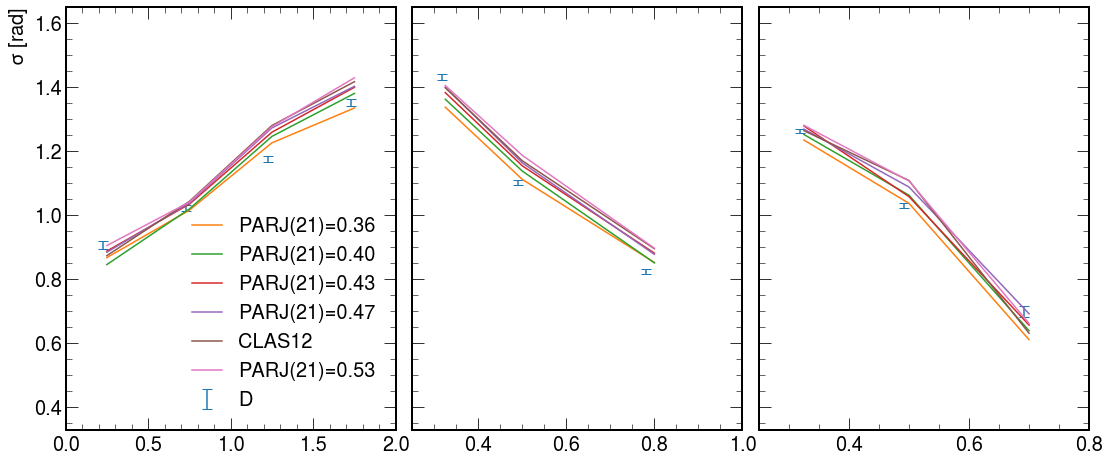

PARJ(21)=0.36
max deviation for D: 0.04354770630794982
max deviation for D: 0.06544134468579411
max deviation for D: 0.1268871735471921
RMS devs: 0.0408204357980298
PARJ(21)=0.40
max deviation for D: 0.06757457373697391
max deviation for D: 0.04813647520511791
max deviation for D: 0.08703993999019895
RMS devs: 0.029508883843039475
PARJ(21)=0.43
max deviation for D: 0.07069645925215215
max deviation for D: 0.06865578389610652
max deviation for D: 0.0616819217458754
RMS devs: 0.021799115895615544
PARJ(21)=0.47
max deviation for D: 0.08212329005289498
max deviation for D: 0.0639828407167286
max deviation for D: 0.05739500907167085
RMS devs: 0.018561703389409184
CLAS12
max deviation for D: 0.08850389270292679
max deviation for D: 0.08537792073944322
max deviation for D: 0.09852956458840355
RMS devs: 0.0395756065460573
PARJ(21)=0.53
max deviation for D: 0.0854274379045514
max deviation for D: 0.08742441989566785
max deviation for D: 0.07569746353413737
RMS devs: 0.029786336500532834


In [118]:
tweak_tests(("_tweak_2023_02_10_18h_14m_45s",
             "_tweak_2023_02_10_18h_15m_48s",
             "_tweak_2023_02_10_18h_16m_59s",
             "_tweak_2023_02_09_16h_50m_42s",
             "_tweak_2023_02_09_16h_49m_08s", 
            "_tweak_2023_02_09_16h_52m_03s"))

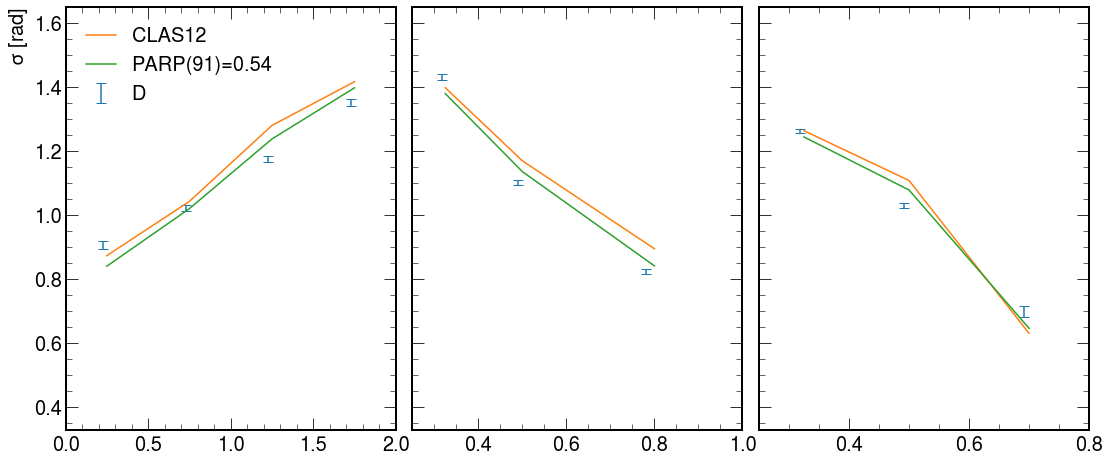

CLAS12
max deviation for D: 0.08850389270292679
max deviation for D: 0.08537792073944322
max deviation for D: 0.09852956458840355
RMS devs: 0.0395756065460573
PARP(91)=0.54
max deviation for D: 0.07305383856138412
max deviation for D: 0.03575092800748692
max deviation for D: 0.07620405863590779
RMS devs: 0.02892629835171395


In [119]:
tweak_tests(("_tweak_2023_02_09_16h_49m_08s", "_tweak_2023_02_09_16h_53m_27s"))